<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/KNN_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/test.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
dataset = df_train[['Pclass','Sex','Age','Survived']]
print("Total", len(dataset))
print(dataset.isnull().sum())

Total 891
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64


In [8]:
dataset = dataset.dropna()
print(len(dataset))

714


In [9]:
gender_map = {'male':0, 'female':1}
dataset['Sex'] = dataset.Sex.map(gender_map)

In [10]:
dataset.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


Create Test Train Split

In [11]:
X = dataset.drop(['Survived'], axis='columns')
y = dataset.Survived

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print("Total",len(X))
print("Train size ", len(X_train))
print("Test size", len(X_test))

Total 714
Train size  571
Test size 143


2. Build a Log Reg Model with pipeline with Standard Scalar using train data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1,40):
  #knn = KNeighboursClassifier(n_neighbours=i)
  knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i))])
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

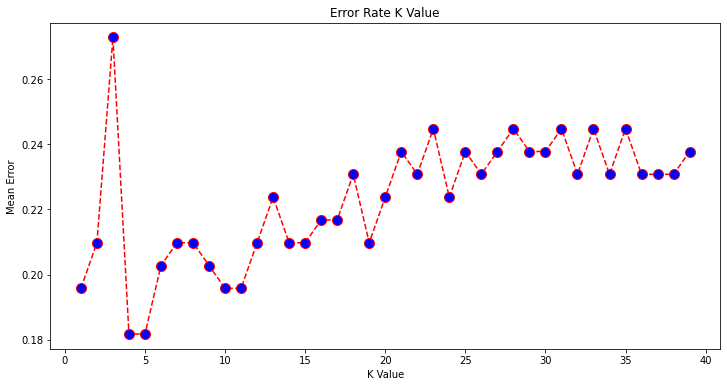

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [16]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

3. Calculate Score for test data

In [17]:
print("Training", knn.score(X_train, y_train))
print("Test", knn.score(X_test, y_test))

Training 0.8126094570928196
Test 0.7272727272727273


4. Print model metrics(f1 score, accuracy, etc)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
y_hat = knn.predict(X_test)

In [20]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        79
           1       0.75      0.59      0.66        64

    accuracy                           0.73       143
   macro avg       0.73      0.71      0.72       143
weighted avg       0.73      0.73      0.72       143



In [21]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[66, 13],
       [26, 38]])

Text(15.0, 0.5, 'Truth')

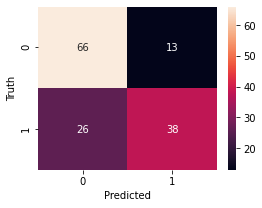

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')